In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**The features**

In [2]:
bzcat_orig = pd.read_csv('data/BZCAT_all_features.csv')
bzcat_orig.drop(columns=['Unnamed: 0'], inplace=True)
bzcat = bzcat_orig.copy()

Features with obvious multicollinearity (directly calculated from redshift):

'Redshift', 'universe_age_Gyr', 'comoving_distance_Mpc', 'lookback_distance_Mpc', 'luminosity_distance_Mpc', 'distance_modulus_mag'

I'll leave the comoving distance_Mpc as the objects are more uniformly distributed over it, which may become sufficient for the clustering)

In [3]:
bzcat.drop(columns=[
    'Redshift', 'universe_age_Gyr', 'lookback_distance_Mpc',
    'luminosity_distance_Mpc', 'distance_modulus_mag'],
    inplace=True)

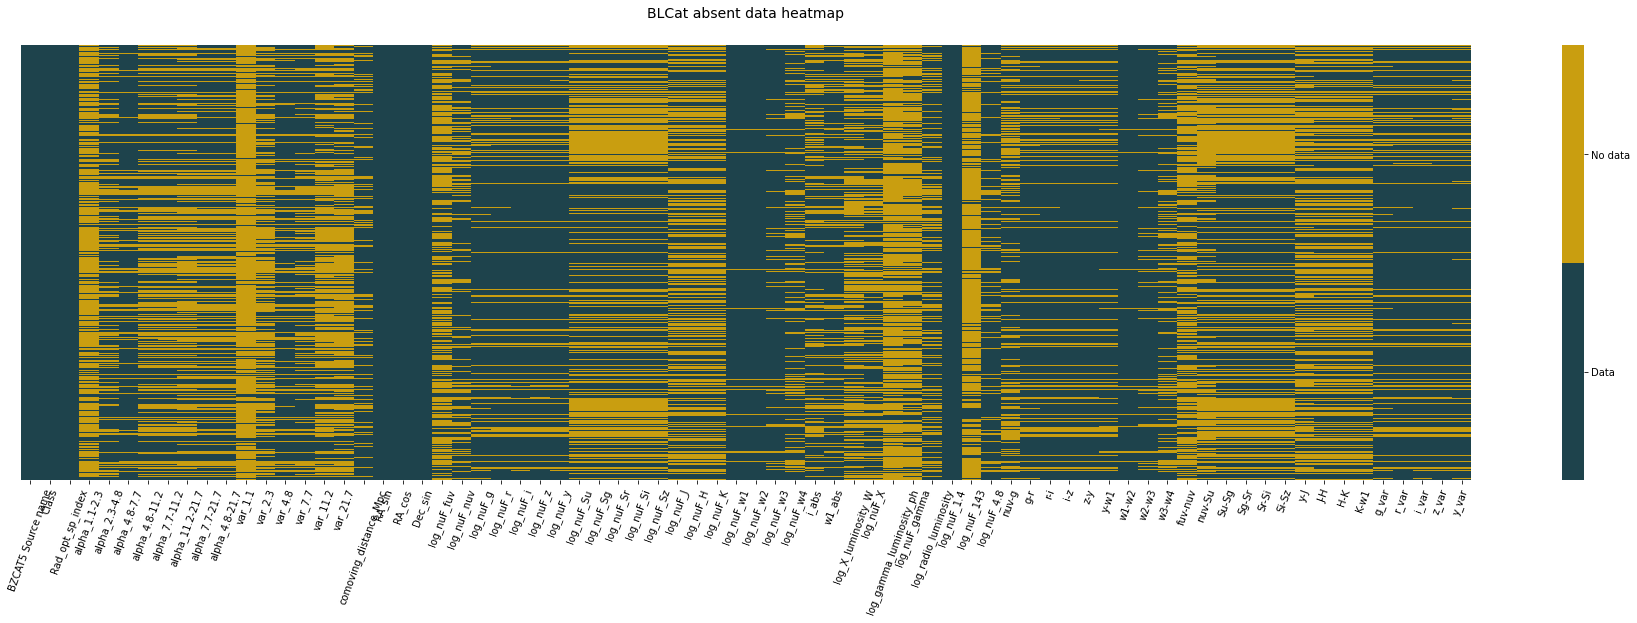

In [4]:
colors = ['#1e434c', '#c99e10'] 
fig = plt.figure(figsize=(32.5, 8))
ax = sns.heatmap(
    bzcat.isnull(),  
    cmap=sns.color_palette(colors),
    yticklabels=False
)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Data', 'No data'])

plt.xticks(rotation=70)
ax.set_title('BLCat absent data heatmap', y=1.05, fontsize = 14);

Variables used in the first, BLCat sample, test 

'Rad_opt_sp_index', 'alpha_2.3-4.8', 'alpha_4.8-7.7', 'alpha_4.8-11.2',
       'alpha_7.7-11.2', 'alpha_11.2-21.7', 'alpha_7.7-21.7', 'var_7.7',
       'var_4.8', 'comoving_distance_Mpc', 'RA_sin', 'RA_cos', 'Dec_sin',
       'log_nuF_g', 'log_nuF_r', 'log_nuF_i', 'log_nuF_z', 'log_nuF_y',
       'log_nuF_w1', 'log_nuF_w2', 'log_nuF_w3', 'log_nuF_w4', 'i_abs',
       'w1_abs', 'log_radio_luminosity', 'log_nuF_1.4', 'log_nuF_4.8', 'g-r',
       'r-i', 'i-z', 'z-y', 'y-w1', 'w1-w2', 'w2-w3', 'w3-w4', 'g_var',
       'r_var', 'i_var', 'z_var', 'y_var', 'BLLac', 'BZG', 'BZQ', 'BZU'

In [5]:
bzcat.iloc[:,0:20].isnull().mean()

BZCAT5 Source name       0.000000
Class                    0.000000
Rad_opt_sp_index         0.000000
alpha_1.1-2.3            0.771413
alpha_2.3-4.8            0.351306
alpha_4.8-7.7            0.167930
alpha_4.8-11.2           0.431059
alpha_7.7-11.2           0.431340
alpha_11.2-21.7          0.515586
alpha_7.7-21.7           0.411963
alpha_4.8-21.7           0.412805
var_1.1                  0.898905
var_2.3                  0.574558
var_4.8                  0.227464
var_7.7                  0.315361
var_11.2                 0.620612
var_21.7                 0.637461
comoving_distance_Mpc    0.201910
RA_sin                   0.000000
RA_cos                   0.000000
dtype: float64

In [6]:
# Dropping columns with many missing values

cols_to_drop = bzcat.isnull().mean() > 0.4
cols_to_drop = cols_to_drop[cols_to_drop==True].index

bzcat.drop(columns=cols_to_drop, inplace=True)

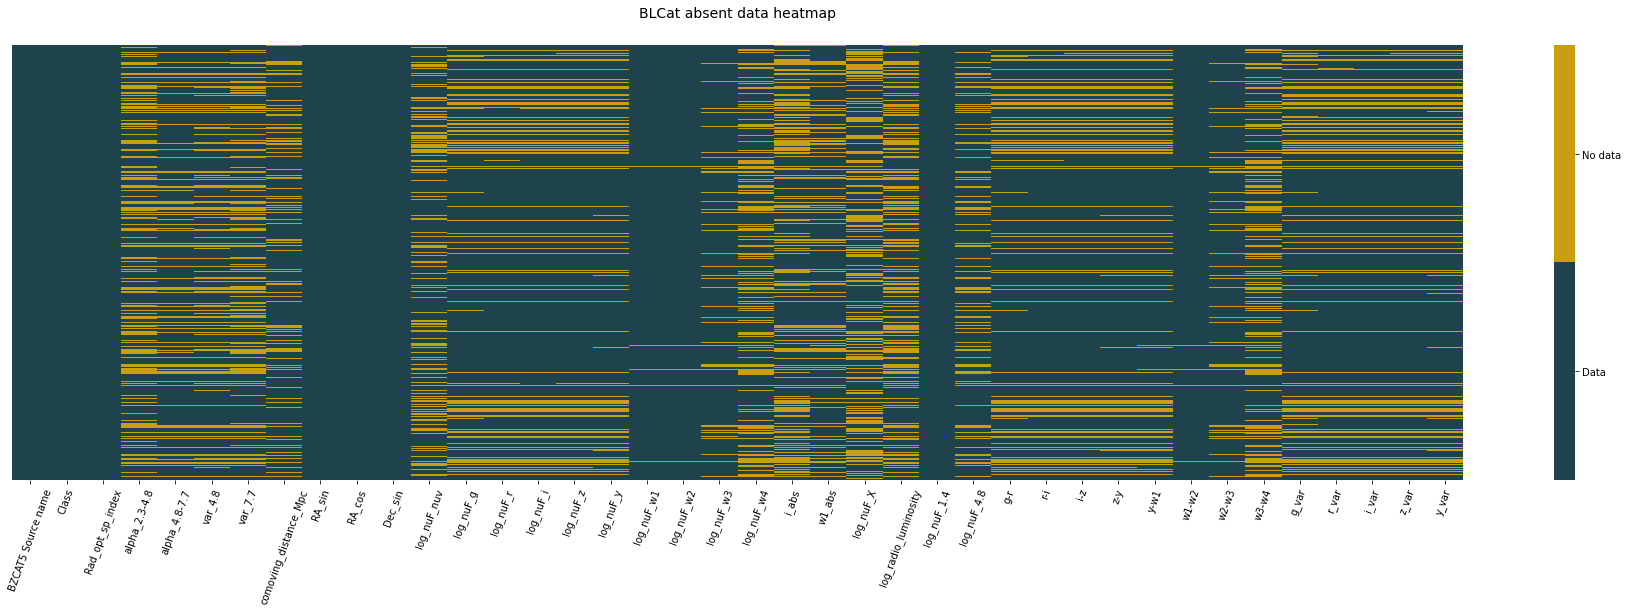

In [7]:
colors = ['#1e434c', '#c99e10'] 
fig = plt.figure(figsize=(32.5, 8))
ax = sns.heatmap(
    bzcat.isnull(),  
    cmap=sns.color_palette(colors),
    yticklabels=False
)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Data', 'No data'])

plt.xticks(rotation=70)
ax.set_title('BLCat absent data heatmap', y=1.05, fontsize = 14);

In [8]:
bzcat.columns

Index(['BZCAT5 Source name', 'Class', 'Rad_opt_sp_index', 'alpha_2.3-4.8',
       'alpha_4.8-7.7', 'var_4.8', 'var_7.7', 'comoving_distance_Mpc',
       'RA_sin', 'RA_cos', 'Dec_sin', 'log_nuF_nuv', 'log_nuF_g', 'log_nuF_r',
       'log_nuF_i', 'log_nuF_z', 'log_nuF_y', 'log_nuF_w1', 'log_nuF_w2',
       'log_nuF_w3', 'log_nuF_w4', 'i_abs', 'w1_abs', 'log_nuF_X',
       'log_radio_luminosity', 'log_nuF_1.4', 'log_nuF_4.8', 'g-r', 'r-i',
       'i-z', 'z-y', 'y-w1', 'w1-w2', 'w2-w3', 'w3-w4', 'g_var', 'r_var',
       'i_var', 'z_var', 'y_var'],
      dtype='object')

In [9]:
alphas = [
    'alpha_2.3-4.8', 'alpha_4.8-7.7']
fluxes = [
    'log_nuF_nuv',
    'log_nuF_g', 'log_nuF_r', 'log_nuF_i', 'log_nuF_z', 'log_nuF_y', 
    'log_nuF_w1', 'log_nuF_w2', 'log_nuF_w3', 'log_nuF_w4', 
    'log_nuF_X',
    'log_nuF_1.4', 'log_nuF_4.8']
colors = ['g-r', 'r-i', 'i-z', 'z-y', 'y-w1', 'w1-w2', 'w2-w3', 'w3-w4']
radio_vars = ['var_7.7', 'var_4.8']
opt_vars = ['g_var', 'r_var', 'i_var', 'z_var', 'y_var']
luminosities = ['i_abs', 'w1_abs', 'log_radio_luminosity']

**Dropping correlated features**

In [10]:
def get_correlated(corr_matrix, thres=0.7):
    """Getting correlated pairs from a correlation matrix 
       with correlation coefficients higher than the threshold

    Args:
        corr_matrix (pandas DataFrame): correlation matrix (e.g., from df.corr())
        thres (float, optional): threshold. Defaults to 0.7 (i.e., coeff > 0.7 or coeff < -0.7).

    Returns:
        pandas Series: correlated pairs and correlation coefficients
    """
    
    correlated_pairs = {}
    
    for col in corr_matrix.columns:
        positive_filter = corr_matrix[col] >= thres
        negative_filter = corr_matrix[col] <= -thres
        match_series = corr_matrix[col][positive_filter | negative_filter]
        for match in match_series.index:
            if match != col and match + ' -- ' + col not in correlated_pairs.keys():
                correlated_pairs.update({col + ' -- ' + match: match_series[match]})
   
    return pd.Series(correlated_pairs).sort_values()

In [11]:
bzcat[alphas].corr()

,alpha_2.3-4.8,alpha_4.8-7.7
alpha_2.3-4.8,1.000000,-0.015361
alpha_4.8-7.7,-0.015361,1.000000


In [12]:
get_correlated(bzcat[fluxes].corr())

log_nuF_g -- log_nuF_w2       0.709552
log_nuF_nuv -- log_nuF_z      0.709807
log_nuF_nuv -- log_nuF_i      0.719312
log_nuF_r -- log_nuF_w2       0.756191
log_nuF_nuv -- log_nuF_r      0.764236
log_nuF_r -- log_nuF_w1       0.766382
log_nuF_i -- log_nuF_w2       0.771970
log_nuF_w1 -- log_nuF_w4      0.773928
log_nuF_i -- log_nuF_w1       0.796746
log_nuF_z -- log_nuF_w2       0.804324
log_nuF_nuv -- log_nuF_g      0.805008
log_nuF_w1 -- log_nuF_w3      0.811592
log_nuF_y -- log_nuF_w2       0.817763
log_nuF_z -- log_nuF_w1       0.833889
log_nuF_w2 -- log_nuF_w4      0.846810
log_nuF_y -- log_nuF_w1       0.851627
log_nuF_g -- log_nuF_y        0.874572
log_nuF_g -- log_nuF_z        0.901684
log_nuF_w2 -- log_nuF_w3      0.902594
log_nuF_1.4 -- log_nuF_4.8    0.910684
log_nuF_g -- log_nuF_i        0.917205
log_nuF_r -- log_nuF_y        0.929706
log_nuF_r -- log_nuF_z        0.952115
log_nuF_g -- log_nuF_r        0.952181
log_nuF_i -- log_nuF_y        0.953831
log_nuF_w3 -- log_nuF_w4 

<AxesSubplot:xlabel='log_nuF_g', ylabel='log_nuF_w1'>

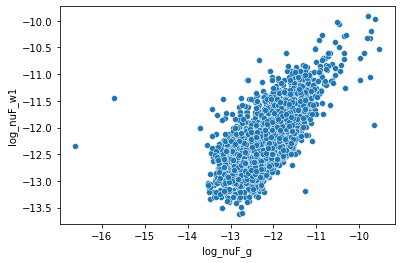

In [13]:
sns.scatterplot(data=bzcat, x='log_nuF_g', y ='log_nuF_w1')

In [14]:
bzcat[fluxes].isnull().mean()

log_nuF_nuv    0.295142
log_nuF_g      0.194889
log_nuF_r      0.186184
log_nuF_i      0.181410
log_nuF_z      0.183095
log_nuF_y      0.193204
log_nuF_w1     0.015445
log_nuF_w2     0.014603
log_nuF_w3     0.085088
log_nuF_w4     0.288683
log_nuF_X      0.368436
log_nuF_1.4    0.003089
log_nuF_4.8    0.185622
dtype: float64

In [15]:
cols_to_drop = [
    'log_nuF_w1', 'log_nuF_w3', 'log_nuF_w4', 'log_nuF_g', 'log_nuF_r', 
    'log_nuF_i', 'log_nuF_z', 'log_nuF_y', 'log_nuF_4.8']
bzcat.drop(columns=cols_to_drop, inplace=True)
for col in cols_to_drop:
    fluxes.remove(col)

In [16]:
bzcat[fluxes].corr()

,log_nuF_nuv,log_nuF_w2,log_nuF_X,log_nuF_1.4
log_nuF_nuv,1.000000,0.654562,0.402528,0.203306
log_nuF_w2,0.654562,1.000000,0.335670,0.300040
log_nuF_X,0.402528,0.335670,1.000000,-0.173713
log_nuF_1.4,0.203306,0.300040,-0.173713,1.000000


In [17]:
bzcat[luminosities].corr()

,i_abs,w1_abs,log_radio_luminosity
i_abs,1.000000,0.922195,-0.796091
w1_abs,0.922195,1.000000,-0.843391
log_radio_luminosity,-0.796091,-0.843391,1.000000


In [18]:
bzcat[luminosities].isnull().mean()

i_abs                   0.348498
w1_abs                  0.214266
log_radio_luminosity    0.328559
dtype: float64

In [19]:
bzcat.drop(columns=['i_abs', 'log_radio_luminosity'], inplace=True)
luminosities.remove('i_abs')
luminosities.remove('log_radio_luminosity')

In [20]:
get_correlated(bzcat.corr())

comoving_distance_Mpc -- w1_abs   -0.825057
dtype: float64

In [21]:
bzcat.drop(columns='w1_abs', inplace=True)

**Hardness**

The radio-to-optical spectral index naturally correlates with the ratio of the radio and optical fluxes $\log_{10}\nu F_{1.4}/\log_{10}\nu F_{w2}$ and other ratios of the $F_{1.4}$ flux, so we omit them here.

In [22]:
bzcat['Opt_uv_sp_index'] = bzcat['log_nuF_w2'] / bzcat['log_nuF_nuv']
bzcat['Opt_X_sp_index'] = bzcat['log_nuF_w2'] / bzcat['log_nuF_X']
bzcat['UV_X_sp_index'] = bzcat['log_nuF_nuv'] / bzcat['log_nuF_X']

hardnesses = [
    'Rad_opt_sp_index', 'Opt_uv_sp_index', 'Opt_X_sp_index', 'UV_X_sp_index']

In [23]:
mask = bzcat['Rad_opt_sp_index'] > -1  # Filtering outliers
bzcat[mask][hardnesses].corr()

,Rad_opt_sp_index,Opt_uv_sp_index,Opt_X_sp_index,UV_X_sp_index
Rad_opt_sp_index,1.000000,-0.147850,-0.235917,-0.153141
Opt_uv_sp_index,-0.147850,1.000000,0.378840,-0.355179
Opt_X_sp_index,-0.235917,0.378840,1.000000,0.729754
UV_X_sp_index,-0.153141,-0.355179,0.729754,1.000000


In [24]:
bzcat[hardnesses].isna().mean()

Rad_opt_sp_index    0.000000
Opt_uv_sp_index     0.300477
Opt_X_sp_index      0.376299
UV_X_sp_index       0.528503
dtype: float64

In [25]:
bzcat.drop(columns='UV_X_sp_index', inplace=True)
bzcat.drop(columns=fluxes, inplace=True)

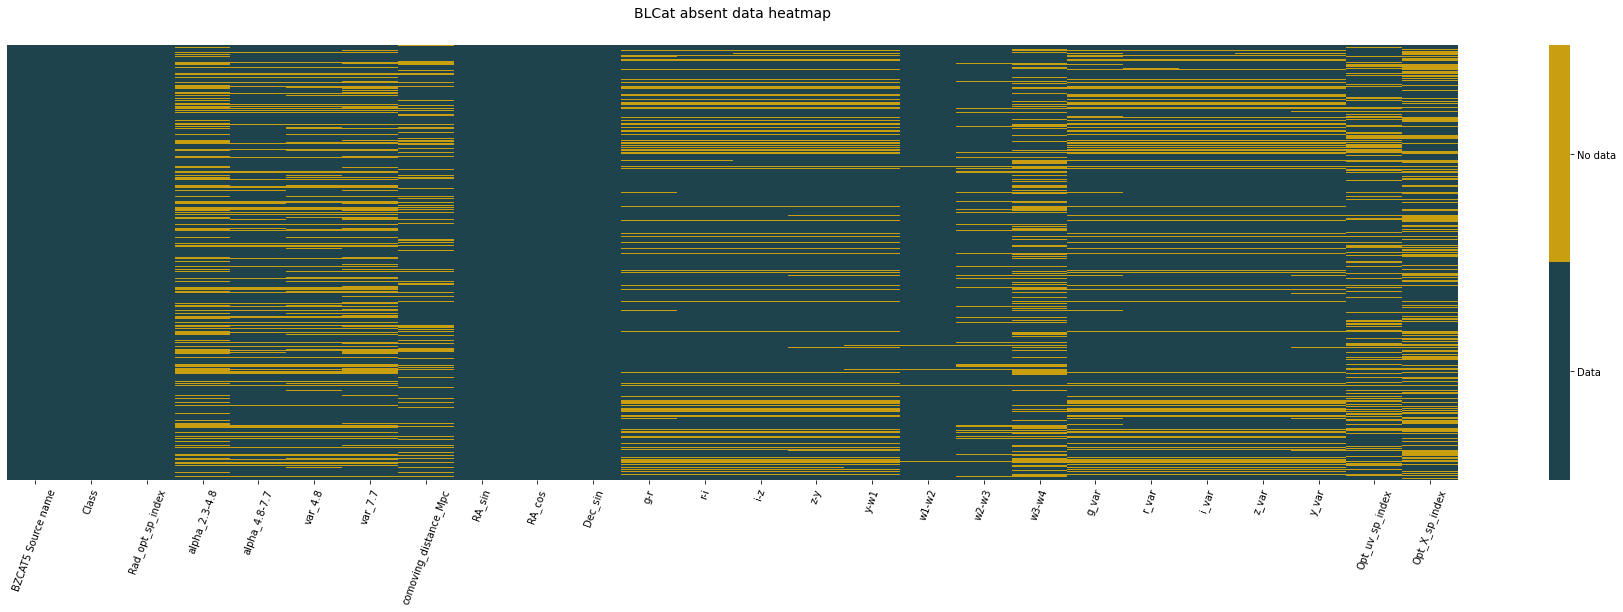

In [26]:
colors = ['#1e434c', '#c99e10'] 
fig = plt.figure(figsize=(32.5, 8))
ax = sns.heatmap(
    bzcat.isnull(),  
    cmap=sns.color_palette(colors),
    yticklabels=False
)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Data', 'No data'])

plt.xticks(rotation=70)
ax.set_title('BLCat absent data heatmap', y=1.05, fontsize = 14);

In [27]:
bzcat.shape

(3561, 26)

In [28]:
bzcat['g_var'] = np.log(bzcat['g_var'])
bzcat['r_var'] = np.log(bzcat['r_var'])
bzcat['i_var'] = np.log(bzcat['i_var'])
bzcat['z_var'] = np.log(bzcat['z_var'])
bzcat['y_var'] = np.log(bzcat['y_var'])

**Dropping all NaN as the base model**

In [29]:
# drop all NaN as the base model
bzcat.dropna(inplace=True)
bzcat.to_csv('data/bzcat_for_profiling.csv')

In [30]:
bzcat.shape

(612, 26)

**Outliers**

In [31]:
mask = bzcat['Rad_opt_sp_index'] > -1
bzcat = bzcat[mask]

In [32]:
# spectral indices: in the range from -2 to 2

for alpha in alphas:
    mask = (bzcat[alpha]>=-2) & (bzcat[alpha]<=2)
    bzcat = bzcat[mask]

<AxesSubplot:xlabel='var_7.7', ylabel='Count'>

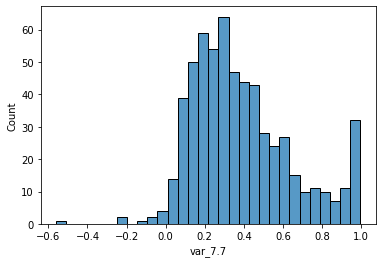

In [33]:
sns.histplot(data=bzcat, x='var_7.7', bins=30)

In [34]:
mask = (bzcat['var_7.7']>-0.1) & (bzcat['var_7.7']<0.9)
bzcat = bzcat[mask]

mask = (bzcat['g-r']>-1) & (bzcat['g-r']<2)
bzcat = bzcat[mask]

#mask = (bzcat['r-i']>-1)
#bzcat = bzcat[mask]

mask = (bzcat['i-z']<1.6)
bzcat = bzcat[mask]

#mask = (bzcat['z-y']>-0.75) & (bzcat['z-y']<1.5)
#bzcat = bzcat[mask]

#mask = (bzcat['w3-w4']<3.5)
#bzcat = bzcat[mask]

In [35]:
for var in opt_vars:
    mask = (bzcat[var] > -5)
    bzcat = bzcat[mask]

In [36]:
mask = (bzcat['Opt_uv_sp_index']>=0.89) & (bzcat['Opt_uv_sp_index']<=1.10)
bzcat = bzcat[mask]
mask = (bzcat['Opt_X_sp_index']>=0.85) & (bzcat['Opt_X_sp_index']<=1.08)


In [37]:
bzcat

,BZCAT5 Source name,Class,Rad_opt_sp_index,alpha_2.3-4.8,alpha_4.8-7.7,var_4.8,var_7.7,comoving_distance_Mpc,RA_sin,RA_cos,...,w1-w2,w2-w3,w3-w4,g_var,r_var,i_var,z_var,y_var,Opt_uv_sp_index,Opt_X_sp_index
12,5BZQJ0005-1648,BZQ,0.686,0.507,-0.600,0.441,0.362,2805.673389,0.023118,0.999733,...,1.023999,2.461000,2.413,-1.432129,-1.169255,-0.752896,-1.239253,-0.841648,1.051738,0.971049
13,5BZQJ0005+0524,BZQ,0.432,0.241,-0.377,0.417,0.375,5140.351819,0.023284,0.999729,...,0.608000,2.945001,2.117,-3.123595,-3.137300,-2.378397,-3.112258,-2.849030,1.049592,0.954246
14,5BZQJ0005+3820,BZQ,0.638,-0.010,1.088,0.415,0.439,957.372355,0.025972,0.999663,...,1.110000,3.285000,2.679,-1.441389,-1.417169,-1.686310,-2.603672,-1.897784,0.896002,0.937837
15,5BZBJ0006-0623,BLLac,0.799,0.319,-0.255,0.544,0.585,1405.963973,0.027187,0.999630,...,1.142000,2.987000,2.502,-1.793963,-0.626423,-0.033763,-0.980031,-0.707854,0.931232,0.939487
21,5BZQJ0008-2339,BZQ,0.499,0.074,-0.781,0.134,0.180,4295.368264,0.034926,0.999390,...,1.379001,3.322000,2.365,-2.896816,-1.878615,-3.423431,-2.989738,-2.484121,1.060417,0.953264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,5BZBJ2347+5142,BLLac,-0.049,-0.270,-0.479,0.227,0.107,192.706855,-0.056341,0.998412,...,0.328000,1.719000,2.026,-1.931716,-1.507335,-2.469816,-1.616463,-1.427948,1.004359,1.009922
3518,5BZQJ2348-1631,BZQ,0.831,-0.220,0.160,0.468,0.557,2192.032104,-0.052147,0.998639,...,1.079000,2.881000,2.394,-0.187054,-2.716570,-2.328922,-4.615115,-0.487111,0.964583,0.949350
3527,5BZGJ2350+3622,BZG,0.590,-0.635,-0.541,0.656,0.469,1294.794100,-0.040936,0.999162,...,0.811000,2.665000,2.151,-0.239783,-2.753575,-0.210969,-1.212679,-0.933180,0.941009,0.940530
3532,5BZQJ2353-2743,BZQ,0.587,0.819,-0.041,0.293,0.684,3103.579839,-0.029705,0.999559,...,0.903000,3.021000,2.730,-1.433799,-3.249353,-1.323511,-2.388135,-0.710497,1.093002,1.007979


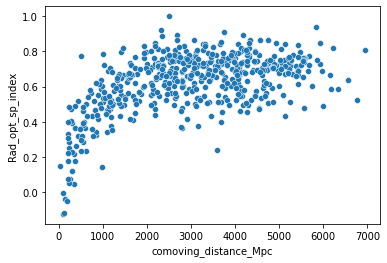

In [40]:
sns.scatterplot(data=bzcat, x='comoving_distance_Mpc', y='Rad_opt_sp_index');

In [41]:
bzcat.to_csv('data/bzcat_clean_noNaN.csv')